<a href="https://colab.research.google.com/github/d2-desai/Mini-Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#classification in animals
#1.cats
#2.dogs
#3.pandas


In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 2.08 ms (started: 2021-06-27 05:25:14 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 3.33 ms (started: 2021-06-27 07:33:52 +00:00)


In [45]:
 #Preprocessing
 import os 
 import matplotlib.pyplot as plt
 import numpy as np
 from skimage.io import imread
 from skimage.transform import resize
 target=[]
 images=[]
 flat_data=[]

 DATADIR='/content/drive/MyDrive/image classification'
 CATEGORIES=['cats','dogs','pandas']

for category in CATEGORIES:
  class_num=CATEGORIES.index(category)
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resize=resize(img_array,(150,150,3))
    flat_data.append(img_resize.flatten())
    images.append(img_resize)
    target.append(class_num)
flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)
    



In [46]:
flat_data

array([[0.67128105, 0.66343791, 0.66735948, ..., 0.7683085 , 0.72909281,
        0.73139346],
       [0.52288192, 0.18300497, 0.01119181, ..., 0.1789281 , 0.17108497,
        0.19607843],
       [0.18352941, 0.14418301, 0.14026144, ..., 0.3145098 , 0.03215686,
        0.04784314],
       ...,
       [0.27083769, 0.34183007, 0.20580501, ..., 0.29715033, 0.42533224,
        0.36287582],
       [0.16518083, 0.11650109, 0.06313943, ..., 0.52463181, 0.50502397,
        0.48247059],
       [0.36993464, 0.4088976 , 0.44484532, ..., 0.14180392, 0.11981699,
        0.06556863]])

<BarContainer object of 3 artists>

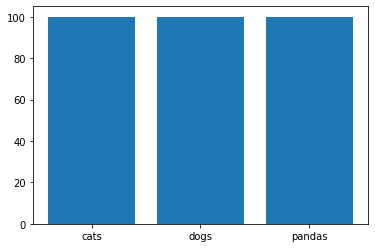

In [47]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.2,random_state=3)

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000], 'kernel':['linear']},
            {'C':[1,10,100,1000], 'gamma':[0.001,0.0001], 'kernel':['rbf']},
]
svc=svm.SVC(probability= True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
 y_pred=clf.predict(x_test)
y_pred

array([0, 2, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 0, 2, 2, 1, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2,
       1, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 0])

In [ ]:
y_test

array([0, 2, 2, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 0, 2,
       1, 1, 1, 2, 0, 1, 2, 0, 2, 2, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0])

time: 3.78 ms (started: 2021-06-27 11:57:07 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.51 ms (started: 2021-06-27 11:57:12 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.95

time: 8.28 ms (started: 2021-06-27 11:57:13 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[20,  1,  1],
       [ 1, 18,  0],
       [ 0,  0, 19]])

time: 10.9 ms (started: 2021-06-27 11:57:14 +00:00)


In [51]:
from sklearn.metrics import classification_report
classification_report(y_pred, y_test)

'              precision    recall  f1-score   support\n\n           0       0.48      0.50      0.49        20\n           1       0.58      0.50      0.54        22\n           2       0.60      0.67      0.63        18\n\n    accuracy                           0.55        60\n   macro avg       0.55      0.56      0.55        60\nweighted avg       0.55      0.55      0.55        60\n'

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 598 ms (started: 2021-06-27 12:06:42 +00:00)


In [ ]:
model=pickle.load(open('img_model.p','rb'))

time: 358 ms (started: 2021-06-27 12:06:43 +00:00)


Enter your URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQSmKWpTwRTgYI-3f6cBxNIncXNid2hK1v2A&usqp=CAU
(175, 288, 3)
PREDICTED OUTPUT:pandas


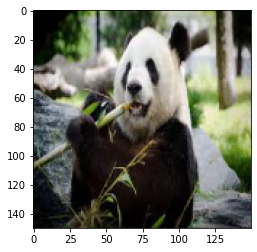

In [ ]:
flat_data=[]
url=input('Enter your URL')
img=imread(url)
img_resize=resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')